<a href="https://colab.research.google.com/github/aayush9628/cs480student/blob/main/04/Copy_of_CS480_Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

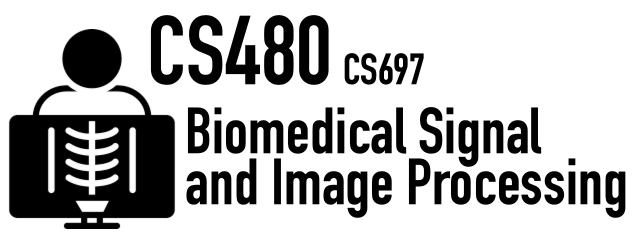
#Assignment 4

In [ ]:
# In this assignment, we will create a Random Forest classifier to detect pneumonia!

In [37]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [38]:
# we are using mahotas again, so lets install it!
!pip install mahotas

In [86]:
# our imports include sklearn this time
import mahotas as mh
import os
from sklearn.ensemble import RandomForestClassifier

**Task 1:** Download, extract, and load the data! [15 Points]

In [40]:
# Please download this file: https://cs480.org/data/xray.zip
# This is a subset of the Kaggle Pneumonia Dataset!
#
# TODO: Upload xray.zip using the file panel on the left.

In [41]:
# Run this code to extract the zip file and to create
# the folder structure of normal/ and pneumonia/ images.
# Each folder contains the first images of the Kaggle dataset.
import zipfile
with zipfile.ZipFile('xray.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

NORMAL_DIR = 'normal/'
PNEUMONIA_DIR = 'pneumonia/'

In [42]:
# Here we load the first image from the normal dataset.
img = mh.imread(NORMAL_DIR + 'IM-0115-0001.jpeg')

In [43]:
# TODO: Please display this image and print the dimensions!

In [44]:
# TODO: YOUR CODE
print("The Dimensions of the image ->",img.shape)

The Dimensions of the image -> (1858, 2090)


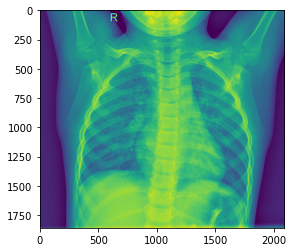

In [45]:
imshow(img)
show()

**Task 2:** Let's do some data wrangling and more visualization! [35 Points]

In [46]:
# This code loads all normal images into a numpy array.
normal_files = os.listdir( NORMAL_DIR )

normal_images = np.zeros( (len(normal_files), 300, 300), dtype=np.float32)

for i in range(len(normal_files)):
  loaded_image = mh.imread( NORMAL_DIR + normal_files[i], as_grey=True )

  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  normal_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [47]:
# This code loads all pneumonia images into a numpy array.
pneumonia_files = os.listdir( PNEUMONIA_DIR )

pneumonia_images = np.zeros( (len(pneumonia_files), 300, 300), dtype=np.float32)

for i in range(len(pneumonia_files)):
  loaded_image = mh.imread( PNEUMONIA_DIR + pneumonia_files[i], as_grey=True )
  
  loaded_image = mh.imresize( loaded_image, (300, 300) )
  img_shape = loaded_image.shape

  pneumonia_images[ i, 0:img_shape[0], 0:img_shape[1] ] = loaded_image

In [48]:
# The two code blocks above perform 2 data wrangling operations.
# Which ones?
# Hint: The first one might be more obvious but the second one happens in the
# last line of each block.
# TODO: Operation 1) YOUR ANSWER
# TODO: Operation 2) YOUR ANSWER

**Operation 1)** Resizing of the image to the new dimensions of (300, 300)
<br>
**Operation 2)** Vectorized assignment of each pixel to the respective element of the numpy 3-Dimension array created before the for loop.

In [49]:
# Now, let's look at the first 5 normal_images and the first 5 pneumonia_images.
# TODO: Please visualize multiple images at once.
# Hint: You can use one of the following answers from StackOverflow for this:
# https://stackoverflow.com/questions/41210823/using-plt-imshow-to-display-multiple-images

In [50]:
# TODO: YOUR CODE

<Figure size 2880x2880 with 0 Axes>

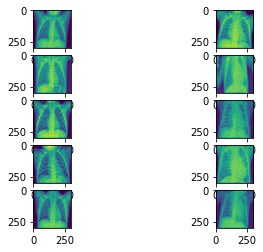

In [125]:
plt.figure(figsize=(40,40))
f, axarr = plt.subplots(5,2)
axarr[0][0].imshow(normal_images[0])
axarr[1][0].imshow(normal_images[1])
axarr[2][0].imshow(normal_images[2])
axarr[3][0].imshow(normal_images[3])
axarr[4][0].imshow(normal_images[4])
axarr[0][1].imshow(pneumonia_images[0])
axarr[1][1].imshow(pneumonia_images[1])
axarr[2][1].imshow(pneumonia_images[2])
axarr[3][1].imshow(pneumonia_images[3])
axarr[4][1].imshow(pneumonia_images[4])

**Task 3:** Setup training and testing data. [15 Points]

In [52]:
# Any supervised machine learning algorithm requires disjunct sets of
# training and testing data.
#
# For each, we will create a balanced dataset that includes an equal number
# of normal xrays and pneumonia xrays.
#
# The training data will include 120 images (60 normal, 60 pneumonia).
# The testing data will include the remaining 80 images (40 normal, 40 pneumonia).
#
# Supervised learning means that we tell the algorithm which image is normal
# and which image is pneumonia. For this, we need the training_target vector.
# The vector shall be 0 for a normal image, and 1 for a pneumonia.

In [53]:
TRAINING_COUNT = 60

training_data = np.zeros( (TRAINING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[0:TRAINING_COUNT] ):
  training_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[0:TRAINING_COUNT] ):
  training_data[i + TRAINING_COUNT] = p.ravel()

In [54]:
# TODO: Please create the training_target vector with 0 for a normal image, and
# 1 for a pneumonia.
training_target = []
for i in range(TRAINING_COUNT):
  training_target.append(0)
for i in range(TRAINING_COUNT):
  training_target.append(1)

In [55]:
TESTING_COUNT = 40

testing_data = np.zeros( (TESTING_COUNT * 2, 300*300 ), dtype=np.float32)
for i, n in enumerate( normal_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i] = n.ravel() # flatten the image
for i, p in enumerate( pneumonia_images[TRAINING_COUNT:TRAINING_COUNT+TESTING_COUNT] ):
  testing_data[i + TESTING_COUNT] = p.ravel()

In [56]:
# TODO: Please create the testing_target vector with 0 for a normal image, and
# 1 for a pneumonia.
testing_target = []
for i in range(TESTING_COUNT):
  testing_target.append(0)
for i in range(TESTING_COUNT):
  testing_target.append(1)

**Task 4:** Let's train and evaluate the Random Forest! [35 Points]

In [57]:
# With scikit-learn, we can easily set up a default Random Forest classifier.
clf = RandomForestClassifier()

In [58]:
# Now, we train the classifier with the training data and the training targets.
# We essentially show the classifier an image and tell whether the image is 
# normal or pneumonia.
fitted = clf.fit( training_data, training_target )

In [59]:
# TODO: In just a few sentences, please explain how the Random Forest works.

Random forest is made up of a lot of independent decision trees, where all those trees give their predictions and the predictions with highest vote wins and is the final classification for the respective input.
It happens to be an ensemble model as it is combining a lot of different trees.

In [63]:
# TODO: YOUR ANSWER

In [104]:
# After training, we can see how well the classifier predicts our testing data.
# The following command will return the classification accuracy.
clf.score( testing_data, testing_target )

0.8875

In [105]:
# TODO: Is the classification accuracy good? And, are you surprised?

It is not bad but considering the fact that we are trying to predict where the person is suffering from a disease or not, it can be improved or some other model like a neural network can be incorportated to make it more reliable because a false prediction to a disease will mean that a healthy person is sick or worse, a sick person is being classified as a healthy person and their illness will go unnoticed. 

In [ ]:
# TODO: YOUR ANSWER

**Bonus:** Let's take a closer look! [33 Points]

In [106]:
# Can you figure out which images were misclassified?
# Hint: You can use predictions = clf.predict(testing_data) for this.
# Can you display them?
# Do you have an idea why these images were problematic?

9


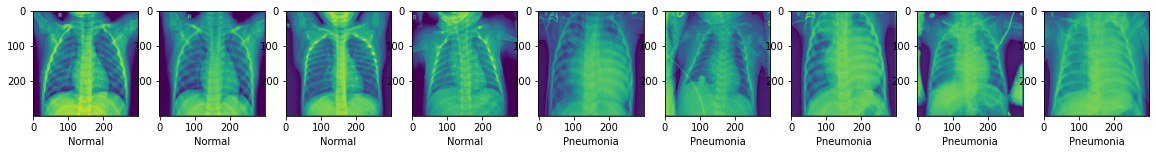

In [123]:
# TODO: YOUR CODE AND YOUR ANSWER
predictions = clf.predict(testing_data)
misclassifications = np.where(testing_target != predictions)
n: int = len(misclassifications[0])
f = plt.figure(figsize=(20,20))
for i in range(n):
  f.add_subplot(1, n, i + 1)
  if(misclassifications[0][i] < 40):
    plt.imshow(normal_images[misclassifications[0][i]])
    plt.xlabel("Normal")
  else:
    plt.imshow(pneumonia_images[misclassifications[0][i]])
    plt.xlabel("Pneumonia")
plt.show(block=True)

In [111]:
# TODO: How can we improve the classification performance?
# Hint: Ideas without code are fine as well.

I think we can improve the classification performance by using CNN as they are taylor made for classifying various images as per class labels. Random forest as a classifier has done a good job of classifying with the accuracy of 88.25% but it can be improved to atleast 95% by using ResNet or any other CNN.

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
# Great job!!!
#           ___
#       _.-'   \
#      /        \
#     /          \
#    /            `.___
#   ( .--.)\/(,.--.    `-.
#   ,',-. \   / ,-.`.     )
#  ( /   \     /   \ )   / \
#   || .-|     |-. ||---'|  \
#  _|| | |     | | ||_   |   \
# /. \ |_|.---.|_| / ,\  | .^.\
# `.\ `--"     "--' /,'  |/
#   `>  _________ <'
# ,-' ,---.---.---. `-.
# `--'\    \j/    /`--'
#    `.\         /,'
#      \\_______//
#       `-------'       hjw